In [49]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [142]:
X = np.loadtxt('input/mfeat-pix.txt')

In [3]:
def plot_digits(digits):
    for i in range(10):
        for j in range(10):
            plt.subplot(1, 10, j + 1)
            digit = digits[j + 200 * i, ].reshape(16, 15)
            plt.imshow(digit, cmap='gray')
            plt.axis('off')
        plt.show()

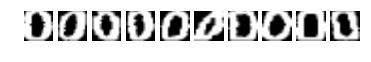

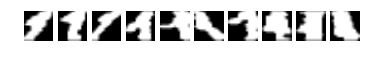

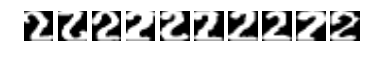

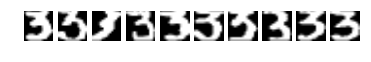

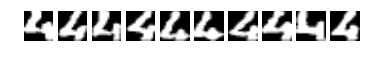

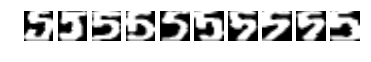

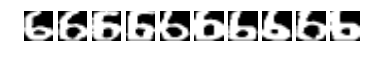

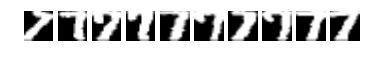

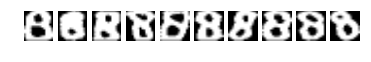

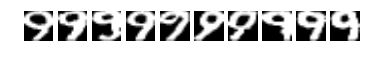

In [5]:
plot_digits(digits = X)

In [178]:
class KMeans:
    def __init__(self, n_clusters=10, max_iter=100, random_state=42):
        self.n_cluster = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
    
    def fit(self, X, normalize=True):
        self.X_rows_ = X.shape[0]
        self.X_cols_ = X.shape[1]
        if self.X_rows_ == self.n_cluster:
            self.labels_ = np.random.choice(self.n_cluster, self.X_rows_, replace=False)
        else:
            self.labels_ = np.random.choice(self.n_cluster, self.X_rows_)
        
        if normalize:
            X = (X - np.min(X)) / (np.max(X) - np.min(X))
        
        self.centers_ = np.zeros((self.n_cluster, self.X_cols_))
        
        self.iter = 0
        while self.iter <  self.max_iter:
            for i in range(self.n_cluster):
                X_i = X[self.labels_ == i, ]
                if X_i.ndim == 1:
                    self.centers_[i, ] = X_i
                elif X_i.size == 0:
                    self.centers_[i, ] = np.zeros(self.X_cols_)
                else:
                    self.centers_[i, ] = np.mean(X_i, axis=0)
            
            new_labels = np.zeros(self.X_rows_)
            for i in range(self.X_rows_):
                dist = np.sum(np.square((X[i] - self.centers_)), axis=1)
                new_labels[i] = np.argmin(dist)
            
            if np.array_equal(self.labels_, new_labels):
                break
            else:
                self.labels_ = new_labels
                self.iter += 1

In [179]:
X = X[0:200, ]

In [ ]:
a = KMeans(n_clusters=200)
a.fit(X)